<a href="https://colab.research.google.com/github/isnanmulia/colab-machinelearning/blob/main/ML_FuzzyInferenceSystem_MesinCuci.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

The problem used here was obtained from one of these videos:
- https://www.youtube.com/watch?v=aAjSFo0SXhg
- https://www.youtube.com/watch?v=fKueNI4kY6A
- https://www.youtube.com/watch?v=RjyRTBNk3w8

In [2]:
!pip install scikit-fuzzy
# Import libraries
import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl
import matplotlib.pyplot as plt

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 994.0/994.0 kB 9.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for scikit-fuzzy: filename=scikit_fuzzy-0.4.2-py3-none-any.whl size=894078 sha256=20401d41169d1197f9f3018c66f8a51a7e4490fe761e60678cc1360cb297a24d
  Stored in directory: /root/.cache/pip/wheels/4f/86/1b/dfd97134a2c8313e519bcebd95d3fedc7be7944db022094bc8
Successfully built scikit-fuzzy


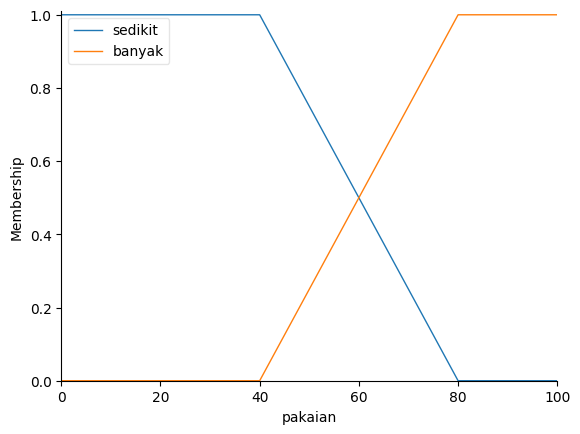

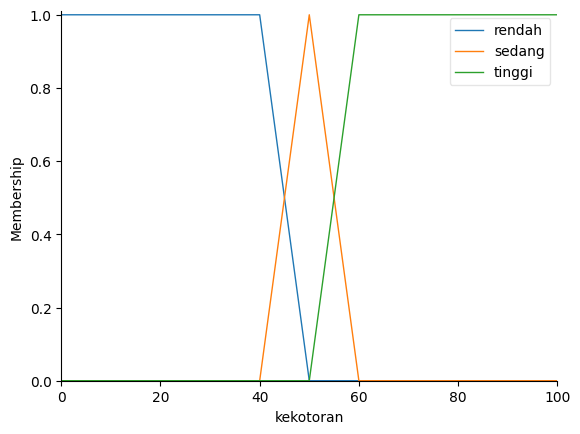

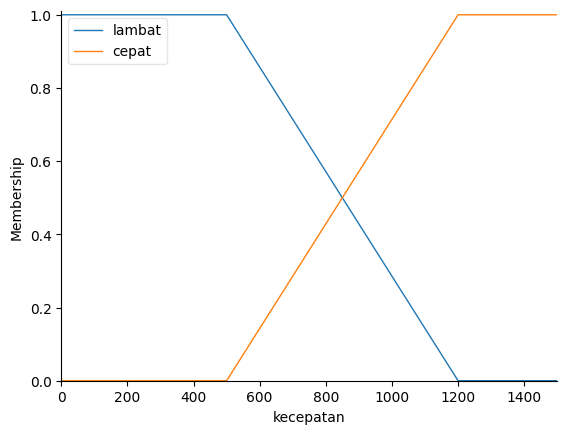

In [3]:
# Set the membership functions
pakaian = ctrl.Antecedent(np.arange(0, 101, 1), 'pakaian')
kekotoran = ctrl.Antecedent(np.arange(0, 101, 1), 'kekotoran')
kecepatan = ctrl.Consequent(np.arange(0, 1501, 1), 'kecepatan')

pakaian['sedikit'] = fuzz.trapmf(pakaian.universe, [0, 0, 40, 80])
pakaian['banyak'] = fuzz.trapmf(pakaian.universe, [40, 80, 100, 100])

kekotoran['rendah'] = fuzz.trapmf(kekotoran.universe, [0, 0, 40, 50])
kekotoran['sedang'] = fuzz.trimf(kekotoran.universe, [40, 50, 60])
kekotoran['tinggi'] = fuzz.trapmf(kekotoran.universe, [50, 60, 100, 100])

kecepatan['lambat'] = fuzz.trapmf(kecepatan.universe, [0, 0, 500, 1200])
kecepatan['cepat'] = fuzz.trapmf(kecepatan.universe, [500, 1200, 1500, 1500])

pakaian.view()
kekotoran.view()
kecepatan.view()

In [4]:
# Set the rules
rule1 = ctrl.Rule(pakaian['sedikit'] & kekotoran['rendah'], kecepatan['lambat'])
rule2 = ctrl.Rule(pakaian['sedikit'] & kekotoran['sedang'], kecepatan['lambat'])
rule3 = ctrl.Rule(pakaian['sedikit'] & kekotoran['tinggi'], kecepatan['cepat'])
rule4 = ctrl.Rule(pakaian['banyak'] & kekotoran['rendah'], kecepatan['lambat'])
rule5 = ctrl.Rule(pakaian['banyak'] & kekotoran['sedang'], kecepatan['cepat'])
rule6 = ctrl.Rule(pakaian['banyak'] & kekotoran['tinggi'], kecepatan['cepat'])

kecepatan_ctrl = ctrl.ControlSystem([rule1, rule2, rule3, rule4, rule5, rule6])
mesin_cuci_ctrl = ctrl.ControlSystemSimulation(kecepatan_ctrl)

In [17]:
mesin_cuci_ctrl.input['pakaian'] = 50
mesin_cuci_ctrl.input['kekotoran'] = 58
mesin_cuci_ctrl.compute()
print(mesin_cuci_ctrl.output)

OrderedDict([('kecepatan', 973.974455062143)])
